# NATO Tide Hackathon 2024

## Noisy Speech-to-Text Challenge

### Team Simiasinus - After Action Report





# Introduction

MON ENORME CHIBRE


# Proposed Architecture

Our implementation was focused on a simple pipeline composed of the following elements :
  1. Converter : converting the audio file in the ```.wav``` format
  2. Filter : CNN/GAN based filter removing the noise from the original audio file
  3. STT : Speech To Text block (whisper) providing text segments from the filtered audio
  4. Diarizer : block taking the audio and text segments as input and returning diarized segments
  5. Consistency check and Formatting : returning new version of the text, checked in consistency and formatted into a ```.csv```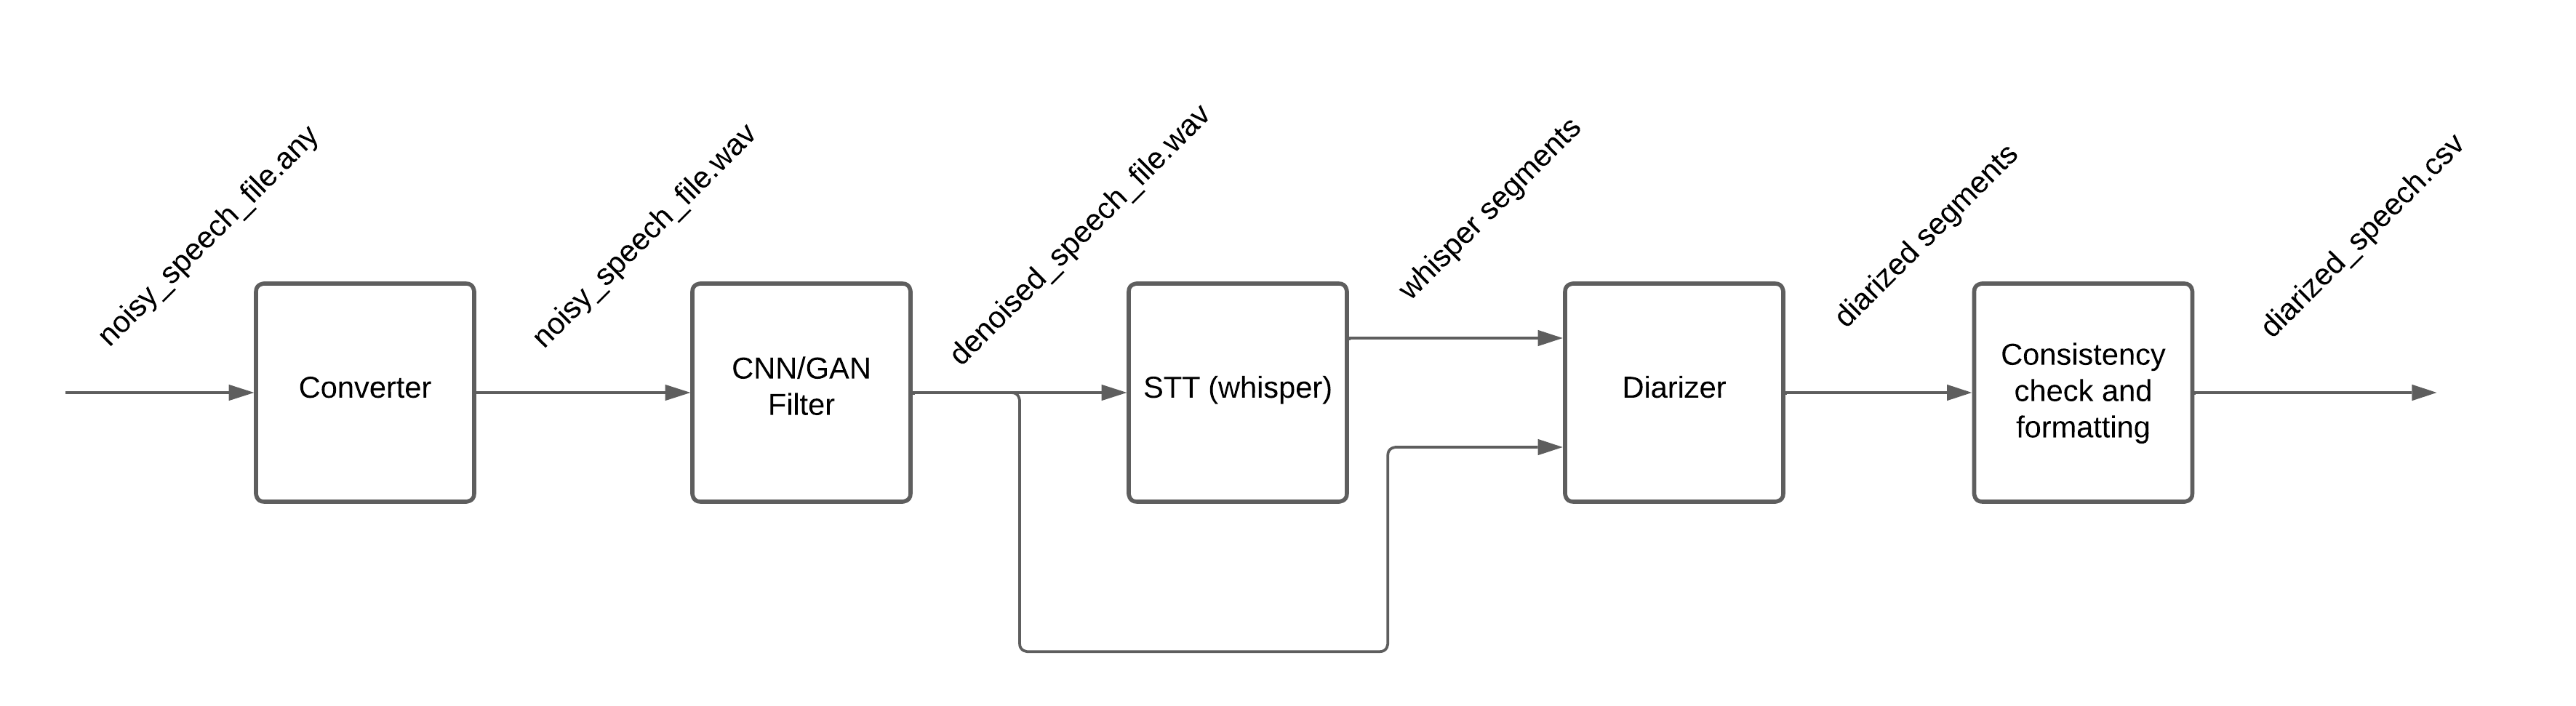

# Pre-Processing

The main innovative idea of our project resides in the pre-processing block of our pipeline. We proposed to completely turn the problem around : instead of considering the input as audio, we analyze it as an image, via a tool called a spectrogram. Image analysis algorithm are currently far more advanced than sound analysis algorithms, and we wanted to use this to our advantage. Hereunder is an example of a sound file, and the corresponding spectrogram. More info on spectrograms can be found on https://en.wikipedia.org/wiki/Spectrogram.

In [ ]:
from IPython.display import Audio
Audio('diar_short_mono.wav')

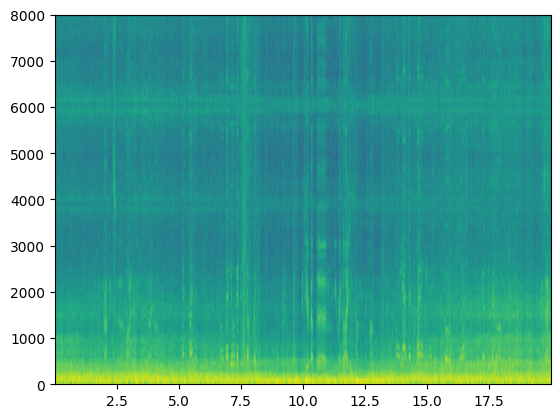

In [ ]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
Fs, aud = wavfile.read('diar_short_mono.wav')
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.show()

We propose here two solutions to analyze, and try to denoise the spectrograms : one solution based on a Convolutional Neural Network (https://en.wikipedia.org/wiki/Convolutional_neural_network), and another based on a Generative Adversarial Network (https://en.wikipedia.org/wiki/Generative_adversarial_network). We also propose an innovative custom dataset to train those Machine Learning algorithms.

## Generative Adversarial Network (GAN)


We thought using a Generative Adversarial Neural Network (GAN) for noise removal in spectral images. The concept behind this choice was straightforward: we provided the network with pairs of sound data containing noise and noise-free counterparts from our database. The GAN was then trained to learn how noise manifests in spectral images and subsequently remove it.

Initially, we considered developing this approach further. However, upon closer examination, we encountered a significant hurdle. There was no readily available open-source code for implementing GAN-based noise removal, and the prospect of building such a network from scratch within the timeframe of the hackathon seemed unfeasible. Therefore, we made the strategic decision to pivot away from this approach and explore alternative solutions that could be implemented more efficiently given our time constraints.

There are a few papers already exploring this idea ([HiFi-GAN](https://arxiv.org/pdf/2006.05694.pdf), [Segan](https://arxiv.org/pdf/1703.09452.pdf))

## Convolutional Neural Network (CNN)

Since working with Generative Adversarial Networks (GANs) proved unfeasible due to time constraints and the lack of available open-source code, our team opted to employ Convolutional Neural Networks (CNNs) instead. The rationale behind this decision is simple: CNNs excel at image processing tasks, making them a suitable alternative for our objective of noise removal in spectral images. By leveraging the inherent capabilities of CNNs to learn intricate patterns and features within images, we aim to develop an effective solution that can efficiently identify and remove noise from our spectral data. Through this approach, we aim to achieve meaningful improvements in image quality within the constraints of our hackathon timeframe.

We used 2 different repos to start our CNN: ([SAB-CNN](https://github.com/EncoraDigital/SAB-cnn-audio-denoiser), [Denoiser-CNN](https://github.com/light-87/Audio-Denoiser/blob/main/Audio_denoising_Notebook.ipynb))

During our hackathon, we diligently trained our CNN model using a dataset curated specifically for our noise removal task. However, despite our efforts, we encountered disappointing results. While the model effectively reduced both the sound and the accompanying noise, the output audio it generated exhibited significant degradation in quality. This deterioration in audio fidelity led to a loss of performance while using whisper. Despite our initial optimism, it became evident that our model's inability to preserve audio quality undermined its effectiveness in real-world applications, highlighting the importance of striking a delicate balance between noise reduction and audio fidelity.

## Dataset

In order to train our Machine Learning algorithms, we need to provide a large set of samples of clean speech, accompanied by corresponding samples of noisy speech. Such datasets are not readily available online. We propose a custom dataset based on the Librispeech dataset (clean English speech), and the Freesound 50k dataset (environmental and human noises). The general idea is to divide both datasets in samples of 1 second, and to superpose a random sample of noise to every sample of clean speech. A possible next step would be to allow for multiple noises to be superposed on a single sample of clean speech.

The sample size (1 second) results in an artefact in the output audio : a clicking sound can be heard every second. This should however not hamper normal processing in a Speech-to-Text block.

# Speech-to-Text
Using the state of the art : [Whisper](https://github.com/openai/whisper)

# Diarization

  Our idea for the diarizer block was to sample the denoised audio at the moments corresponding with the segments outputed by the STT block. During each of these segments, we would have estimated voice parameters in a way comparable to what is done in the low bit rate telecomunication systems, using a MELP like voice coder (STANAG 4591).
  
  Using such a parametric voice coder would allow to describe the voice contained in each segment by a vector. The diarizer block would identify clusters in the set of all the segment vectors by running a k-means algorithm. All different clusters in the voice vector space would then be identified as a different speaker. The diarizer block would then only have to return the text segments, labeled with the corresponding speaker (cluster) id.

# Consistency Check and Formatting

The last block from our pipeline would consist in the  analysis of the diarized segements by a locally installed LLM (such as LLaMA). The LLM would be asked to resolve the semantic inconsistencies in the text (or the diarization labels). The last part of the block would format the data into a ```.csv``` file.

# Conclusion

Before we dived into the implementation of each specific block, we tried to prove the usefulness of the CNN/GAN based filter once pipelined with whisper. Unfortunately, despite many training and fine tuning attempts, we could only obtain negligeable or improvement with our filter.